In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [168]:
df = pd.read_csv('C:/Users/user/Desktop/데분/df.csv')
lp_data21 = pd.read_csv('C:/Users/user/Desktop/데분/living_pop2021.csv', encoding = 'cp949')
lp_data22 = pd.read_csv('C:/Users/user/Desktop/데분/living_pop2022.csv', encoding = 'utf-8')

In [169]:
df.drop(df.iloc[:,:1], axis = 1, inplace = True)
lp_data21.drop(lp_data21.iloc[:,:1], axis = 1, inplace = True)

In [170]:
lp_data21['21생활인구평균'] = lp_data21.iloc[:,1:].mean(axis=1)
lp_data22['22생활인구평균'] = lp_data22.iloc[:,1:].mean(axis=1)

lp21 = lp_data21[['행정구역','21생활인구평균']]
lp22 = lp_data22[['행정구역','22생활인구평균']]

df = pd.merge(df,lp22,how='inner',on='행정구역')

In [171]:
df['인구만명당_2021_사업체수'] = df['인구만명당_2021_사업체수'] * df['2023년06월_거주자 인구수'] / 1000 #오류 수정

In [172]:
new_df = df[['행정구역','2023년06월_거주자 인구수','전입인구(2022.1~2023.5)', '전출인구(2022.1~2023.5)',
             '인구만명당_2021_사업체수','2021_인구천명당_의료기관병상수','2021_인구십만명당_문화기반시설수',
             '2022_인구천명당_사설학원수','인구만명당_2023_초등학교수','2022_주택수', '지방소멸위험도',
             '2022출산율']]

In [173]:
new_df['인구만명당_2021_사업체수'] = new_df['인구만명당_2021_사업체수'] * new_df['2023년06월_거주자 인구수'] / 10000
new_df['2021_인구천명당_의료기관병상수'] = new_df['2021_인구천명당_의료기관병상수'] * new_df['2023년06월_거주자 인구수'] / 1000
new_df['2021_인구십만명당_문화기반시설수'] = new_df['2021_인구십만명당_문화기반시설수'] * new_df['2023년06월_거주자 인구수'] /100000
new_df['2022_인구천명당_사설학원수'] = new_df['2022_인구천명당_사설학원수'] * new_df['2023년06월_거주자 인구수'] / 1000
new_df['인구만명당_2023_초등학교수'] = new_df['인구만명당_2023_초등학교수'] * new_df['2023년06월_거주자 인구수'] / 10000

new_df.rename(columns={'인구만명당_2021_사업체수' : '2021_사업체수',
                       '2021_인구천명당_의료기관병상수' : '2021_의료기관병상수',
                       '2021_인구십만명당_문화기반시설수' : '2021_문화기반시설수',
                       '2021_인구천명당_사설학원수' : '2021_사설학원수',
                       '인구만명당_2023_초등학교수' : '2023_초등학교수'}, inplace = True)

<ipython-input-173-4fcf9c87ebcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['인구만명당_2021_사업체수'] = new_df['인구만명당_2021_사업체수'] * new_df['2023년06월_거주자 인구수'] / 10000
<ipython-input-173-4fcf9c87ebcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['2021_인구천명당_의료기관병상수'] = new_df['2021_인구천명당_의료기관병상수'] * new_df['2023년06월_거주자 인구수'] / 1000
<ipython-input-173-4fcf9c87ebcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

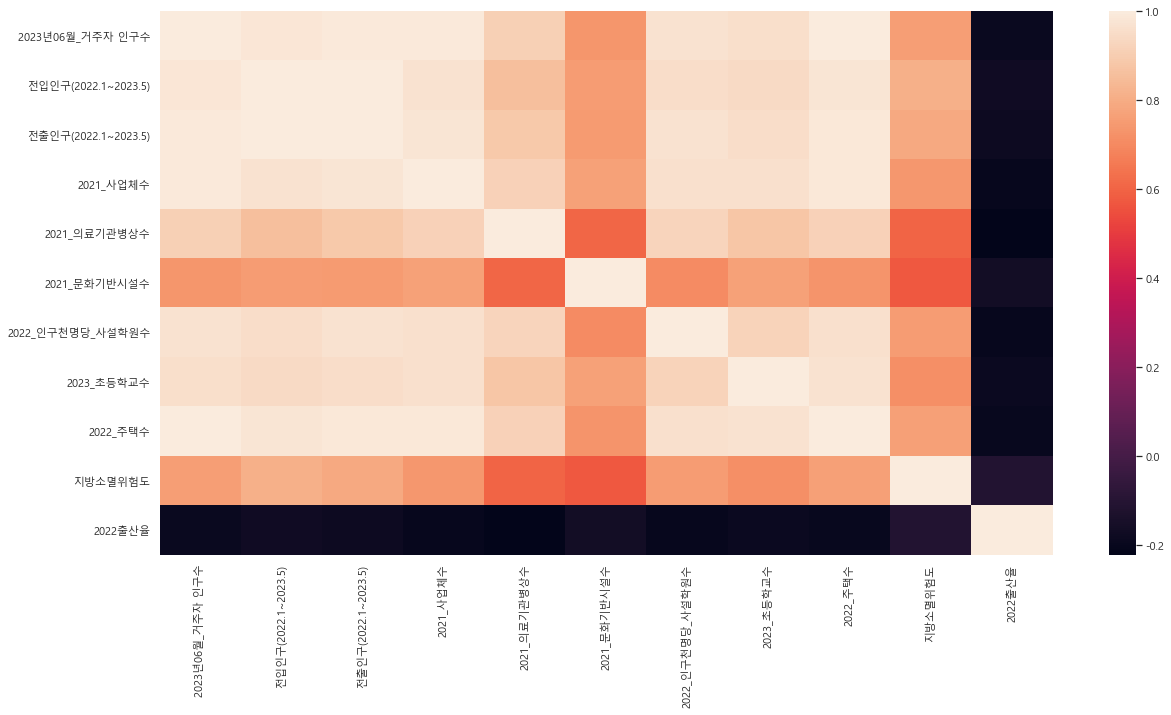

In [174]:
plt.figure(figsize=(20,10))

sns.heatmap(new_df.corr())

plt.show()

In [175]:
new_df.corr()

,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),2021_사업체수,2021_의료기관병상수,2021_문화기반시설수,2022_인구천명당_사설학원수,2023_초등학교수,2022_주택수,지방소멸위험도,2022출산율
2023년06월_거주자 인구수,1.000000,0.981463,0.991644,0.991889,0.913818,0.733810,0.970973,0.959683,0.997235,0.759975,-0.191524
전입인구(2022.1~2023.5),0.981463,1.000000,0.995747,0.967546,0.860503,0.753778,0.955373,0.944172,0.979726,0.813001,-0.172583
전출인구(2022.1~2023.5),0.991644,0.995747,1.000000,0.980196,0.888679,0.747352,0.971271,0.952630,0.989513,0.793466,-0.183974
2021_사업체수,0.991889,0.967546,0.980196,1.000000,0.917280,0.766745,0.961911,0.962326,0.990286,0.737475,-0.203477
2021_의료기관병상수,0.913818,0.860503,0.888679,0.917280,1.000000,0.605750,0.924371,0.876273,0.916429,0.599590,-0.223014
2021_문화기반시설수,0.733810,0.753778,0.747352,0.766745,0.605750,1.000000,0.706192,0.768577,0.729531,0.571492,-0.165331
2022_인구천명당_사설학원수,0.970973,0.955373,0.971271,0.961911,0.924371,0.706192,1.000000,0.923320,0.966212,0.752983,-0.199838
2023_초등학교수,0.959683,0.944172,0.952630,0.962326,0.876273,0.768577,0.923320,1.000000,0.967476,0.713510,-0.185229
2022_주택수,0.997235,0.979726,0.989513,0.990286,0.916429,0.729531,0.966212,0.967476,1.000000,0.762676,-0.197401
지방소멸위험도,0.759975,0.813001,0.793466,0.737475,0.599590,0.571492,0.752983,0.713510,0.762676,1.000000,-0.112297


In [176]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(new_df.iloc[:,1:])

mm_new_df = mm_scaler.fit_transform(new_df.iloc[:,2:])


In [177]:
mm_new_df = pd.DataFrame(mm_new_df, columns=new_df.columns[2:])

In [178]:
mm_new_df = pd.concat([new_df[['행정구역','2023년06월_거주자 인구수']], mm_new_df], axis = 1)

In [179]:
fi = [0.981463,0.991644,0.991889,0.913818,0.733810,0.970973,0.959683,0.997235,0.759975,-0.191524]

for i in range(len(fi)):
    mm_new_df.iloc[:,i+2] = mm_new_df.iloc[:,i+2] * fi[i] # 상관계수 * 스케일된 값 
    

In [180]:
mm_new_df['생활환경지수'] = mm_new_df.iloc[:,2:].sum(axis=1)

In [181]:
lp_df = pd.read_csv('C:/Users/user/Desktop/데분/lp_df4.csv', encoding = 'cp949')

In [182]:
mm_new_df = pd.merge(mm_new_df, lp_df[['행정구역','22생활인구평균','관광 활성화 지수']], how = 'inner', on = '행정구역')

In [183]:
final_df = mm_new_df[['행정구역','2023년06월_거주자 인구수','22생활인구평균','생활환경지수','관광 활성화 지수']]

In [185]:
final_df['인구수대비생활인구평균'] = final_df['22생활인구평균'] / final_df['2023년06월_거주자 인구수']

<ipython-input-185-f34c7a963a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['인구수대비생활인구평균'] = final_df['22생활인구평균'] / final_df['2023년06월_거주자 인구수']


In [187]:
final_df.sort_values('인구수대비생활인구평균')

,행정구역,2023년06월_거주자 인구수,22생활인구평균,생활환경지수,관광 활성화 지수,인구수대비생활인구평균
35,고흥군,61345,2.474577e+06,0.440559,20.8,40.338689
25,진안군,24566,9.990473e+05,0.125023,16.0,40.667885
29,순창군,26802,1.104545e+06,0.277052,14.2,41.211287
28,임실군,26194,1.099158e+06,0.111623,14.7,41.962206
42,함평군,30676,1.300095e+06,0.164973,14.4,42.381493
...,...,...,...,...,...,...
8,화천군,23135,1.719837e+06,0.239886,14.7,74.339196
24,태안군,60908,4.727313e+06,0.475117,64.4,77.613994
5,평창군,40595,3.258379e+06,0.415168,63.1,80.265537
11,고성군(강원),27238,2.469073e+06,0.305398,56.1,90.648110


In [206]:
final_df['생활환경지수'] = final_df['생활환경지수'] * 100

<ipython-input-206-e3a229464b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['생활환경지수'] = final_df['생활환경지수'] * 100


In [207]:
mm_scaler.fit(final_df[['생활환경지수','관광 활성화 지수']])

final_df_mm = mm_scaler.fit_transform(final_df[['생활환경지수','관광 활성화 지수']])


In [230]:
final_df_mm = pd.DataFrame(final_df_mm, columns=['생활환경지수','관광 활성화 지수'])

In [231]:
final_df_mm = pd.concat([final_df[['행정구역']], final_df_mm], axis = 1)

In [232]:
final_df_mm['지역매력도'] = final_df_mm['생활환경지수'] + final_df_mm['관광 활성화 지수']

In [233]:
final_df_mm['인구수대비생활인구평균'] = final_df['인구수대비생활인구평균']

In [236]:
final_df_mm.sort_values(by = '인구수대비생활인구평균')

,행정구역,생활환경지수,관광 활성화 지수,지역매력도,인구수대비생활인구평균
35,고흥군,0.646248,0.178908,0.825156,40.338689
25,진안군,0.211438,0.088512,0.299951,40.667885
29,순창군,0.420935,0.054614,0.475548,41.211287
28,임실군,0.192973,0.064030,0.257003,41.962206
42,함평군,0.266489,0.058380,0.324870,42.381493
...,...,...,...,...,...
8,화천군,0.369720,0.064030,0.433750,74.339196
24,태안군,0.693869,1.000000,1.693869,77.613994
5,평창군,0.611259,0.975518,1.586776,80.265537
11,고성군(강원),0.459995,0.843691,1.303687,90.648110


In [204]:
pd.merge(x['행정구역'], final_df_mm, how = 'inner', on = '행정구역')

,행정구역,생활환경지수,관광 활성화 지수,지역매력도
0,고흥군,0.646248,0.178908,0.825156
1,진안군,0.211438,0.088512,0.299951
2,순창군,0.420935,0.054614,0.475548
3,임실군,0.192973,0.064030,0.257003
4,함평군,0.266489,0.058380,0.324870


In [213]:
x = final_df.sort_values('인구수대비생활인구평균').head(5)

In [214]:
x

,행정구역,2023년06월_거주자 인구수,22생활인구평균,생활환경지수,관광 활성화 지수,인구수대비생활인구평균
35,고흥군,61345,2.474577e+06,44.055926,20.8,40.338689
25,진안군,24566,9.990473e+05,12.502318,16.0,40.667885
29,순창군,26802,1.104545e+06,27.705185,14.2,41.211287
28,임실군,26194,1.099158e+06,11.162288,14.7,41.962206
42,함평군,30676,1.300095e+06,16.497276,14.4,42.381493


In [240]:
final_df.sort_values('관광 활성화 지수')

,행정구역,2023년06월_거주자 인구수,22생활인구평균,생활환경지수,관광 활성화 지수,인구수대비생활인구평균
52,영양군,15829,9.339158e+05,4.268775,11.3,59.000302
60,울릉군,9043,6.391271e+05,10.426707,11.8,70.676449
19,계룡시,45479,1.988998e+06,66.251182,12.1,43.734432
9,양구군,21283,1.395209e+06,27.674845,12.3,65.555083
16,증평군,37232,1.966646e+06,41.974011,12.9,52.821403
...,...,...,...,...,...,...
11,고성군(강원),27238,2.469073e+06,30.539780,56.1,90.648110
12,양양군,27736,2.840636e+06,22.331253,58.8,102.416926
2,홍천군,67448,4.075700e+06,56.556481,62.3,60.427299
5,평창군,40595,3.258379e+06,41.516761,63.1,80.265537


In [69]:
new_df.to_csv('C:/Users/user/Desktop/데분/new_df.csv', index = False)

In [33]:
mm_new_df.to_csv('C:/Users/user/Desktop/데분/mm_new_df.csv', index=False)